## Data Prepocessing and Modeling

### Encoding and scaling features

In this section we preprocess the data. We use a target encoder for nominal categorial features, and leave ordinal features with their original integer encoding. We then normalize all the features.

In [1]:
## Load needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
np.random.seed(220522)

In [2]:
## Load the data
df = pd.read_csv('../data/interim/caravan_cleaned.csv')

In [3]:
## Take a look at that data
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ABESAUT,AMOTSCO,AAANHANG,ATRACTOR,ABROM,ALEVEN,ABRAND,AFIETS,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,0,0,1,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,0,0,1,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,0,0,1,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,0,0,1,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,0,0,1,0,0,0


We split data into features and target. Note that for this project, there is no need to split data into training and tests sets at this stage.

In [4]:
y = df.CARAVAN
X = df.drop('CARAVAN', axis=1)

Recall that the features 'MOSHFD' and 'MOSTYPE' are nominal, while all other features are ordinal. We use a target encoder on these columns, leaving all other columns with their current ordinal encoding.

In [5]:
## Fit a category encoder to the data.
## This will target encode our two nominal columns.

ce_enc = ce.TargetEncoder(cols=['MOSHOOFD', 'MOSTYPE'])
ce_enc.fit(X, y)
X = ce_enc.transform(X, y)

In [6]:
## Fit a scaler to the training data, 
## and use it to standardize training data.

feature_labels = X.columns
my_scale = StandardScaler()
X = my_scale.fit_transform(X)

In [7]:
## Turn the transformed features back into a DataFrame
X = pd.DataFrame(X, columns=feature_labels)
X.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSAUT,ABESAUT,AMOTSCO,AAANHANG,ATRACTOR,ABROM,ALEVEN,ABRAND,AFIETS,ABYSTAND
0,0.004810,-0.308929,0.422163,-1.265844,-0.040809,-0.744433,0.217685,-0.039357,-0.161761,0.429007,...,0.752959,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967
1,0.656344,-0.308929,-0.853461,-1.265844,-0.040809,0.318735,-0.360073,-0.039357,0.463133,-0.097450,...,-0.950807,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967
2,0.656344,-0.308929,-0.853461,-1.265844,-0.040809,-0.744433,-0.360073,0.966047,0.463133,-1.676823,...,0.752959,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967
3,-0.771241,-0.308929,0.422163,-0.004066,0.424875,1.381902,-0.937831,0.966047,0.463133,-0.623908,...,0.752959,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967
4,-1.888668,-0.308929,1.697787,-1.265844,-1.461467,0.318735,-0.360073,-0.039357,0.463133,0.429007,...,-0.950807,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967


In [8]:
# Save the preprocessed data
X.to_csv('../data/processed/caravan_features.csv', index=False)
y.to_csv('../data/processed/caravan_labels.csv', index=False)

### Feature selection with the featurewiz package

During EDA, we found that there were many highly-correlated variables in the data. Selecting a non-redundant set of predictors is needed. We use the the featurewiz package, which performs feature selection in two steps.

* Find an uncorrelated list of predictors, by looking for pairs of highly-correlated predictors and dropping the member of each pair which has a lower mutual information score with the target.

* Repeatedly fit a simple gradient boosting model to the uncorrelated features, and return a list of features which contribute most to the gradient boosting models.

/home/rkarpman/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Imported DASK version = 0.1.00. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (8379, 70)
    Caution: We will try t

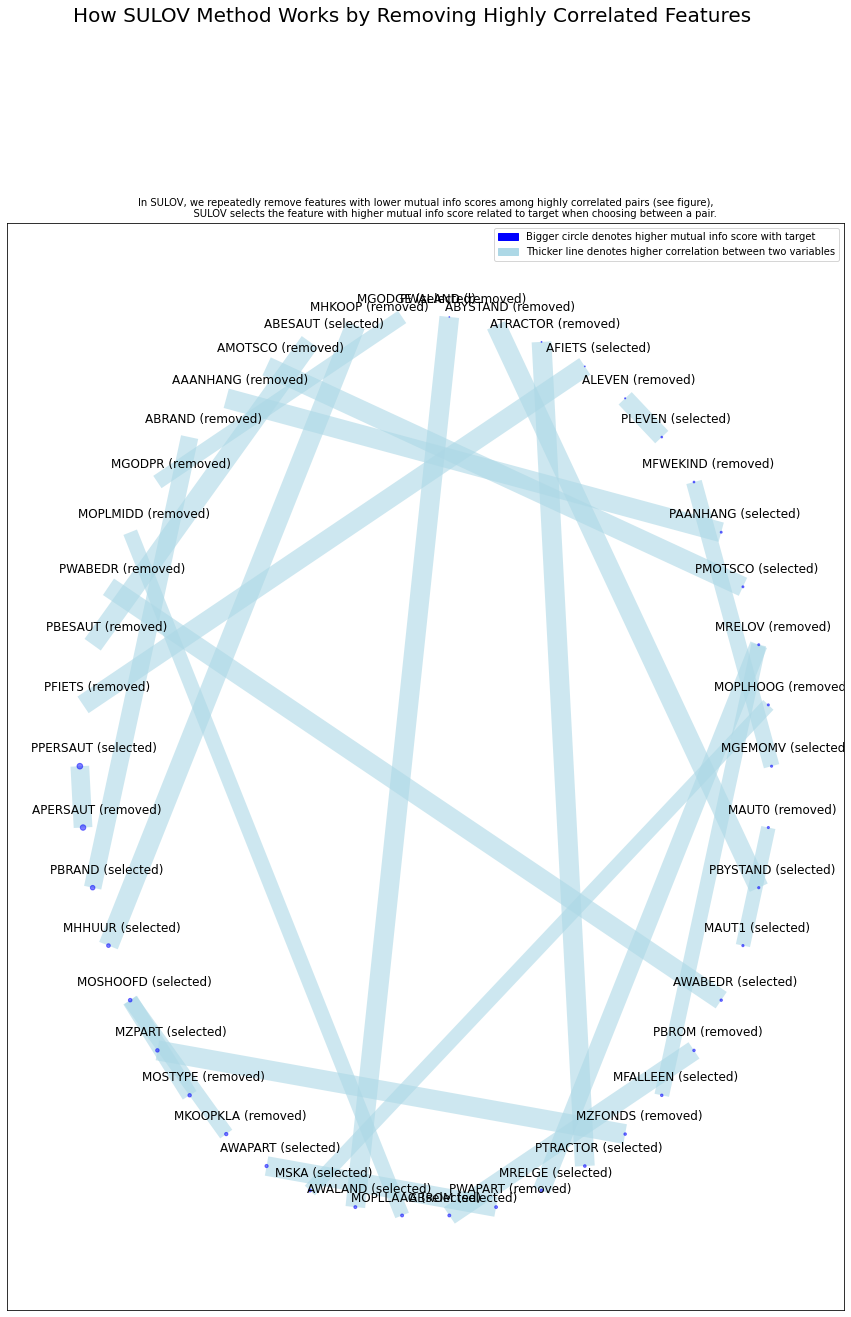

Time taken for SULOV method = 5 seconds
    Adding 0 categorical variables to reduced numeric variables  of 46
Final list of selected vars after SULOV = 46
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 46 
    XGBoost version: 1.5.2
Number of booster rounds = 100
        using 46 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 37 variables...
            Time taken for regular XGBoost feature selection = 3 seconds
        using 28 variables...
            Time taken for regular XGBoost feature selection = 4 seconds
        using 19 variables...
            Time taken for regular XGBoost feature selection = 5 seconds
        using 10 variables...
            Time taken for regular XGBoost feature selection = 6 seconds
        using 1 variables...
            Time taken fo

In [9]:
from featurewiz import FeatureWiz

features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=1)
df_selected = features.fit_transform(X, y)

Featurewiz removed 23 highly-correlated variables, then selected 15 of the remaining uncorrelated variables as important.

In [10]:
## Print out list of selected features
features.features

['PPERSAUT',
 'AWALAND',
 'MOPLLAAG',
 'MINKGEM',
 'ABROM',
 'MOSHOOFD',
 'PBYSTAND',
 'AFIETS',
 'AWABEDR',
 'AWAPART',
 'PLEVEN',
 'MAUT1',
 'MGODGE',
 'MGEMOMV',
 'ABESAUT']

In [11]:
## Examine the dataframe of selected features
df_selected.head()

,PPERSAUT,AWALAND,MOPLLAAG,MINKGEM,ABROM,MOSHOOFD,PBYSTAND,AFIETS,AWABEDR,AWAPART,PLEVEN,MAUT1,MGODGE,MGEMOMV,ABESAUT
0,1.049762,-0.159942,1.076196,0.137927,-0.275223,-0.040809,-0.126494,-0.170982,-0.127484,-0.851759,-0.245317,1.292059,-0.161761,0.422163,-0.105365
1,-1.013240,-0.159942,-0.233971,0.898250,-0.275223,-0.040809,-0.126494,-0.170982,-0.127484,1.174040,-0.245317,0.636325,0.463133,-0.853461,-0.105365
2,1.049762,-0.159942,-0.233971,-0.622396,-0.275223,-0.040809,-0.126494,-0.170982,-0.127484,1.174040,-0.245317,0.636325,0.463133,-0.853461,-0.105365
3,1.049762,-0.159942,-1.107416,0.137927,-0.275223,0.424875,-0.126494,-0.170982,-0.127484,-0.851759,-0.245317,1.947792,0.463133,0.422163,-0.105365
4,-1.013240,-0.159942,-1.980861,1.658573,-0.275223,-1.461467,-0.126494,-0.170982,-0.127484,-0.851759,-0.245317,-0.019408,0.463133,1.697787,-0.105365


In [12]:
## Save dataframe of select features
df_selected.to_csv('../data/processed/caravan_features_selected.csv', index=False)

### Clustering data for customer segmentation

The goal of this section is to find a natural and informative clustering of the data, which divides the customer base into segments with different levels of Caravan insurance usage. 

To find the best clustering, we will try varying both the number of clusters, and the number of predictors included.

In [13]:
# Create list of features in descending order of mutual information score with target,
# to help with feature selection.
from sklearn.feature_selection import mutual_info_classif
rankings = mutual_info_classif(df_selected, y, discrete_features=True)
rankings_series = pd.Series(rankings, index=df_selected.columns)
rankings_series = rankings_series.sort_values(ascending=False)
rankings_series

PPERSAUT    0.014649
MOSHOOFD    0.007136
MINKGEM     0.005155
MOPLLAAG    0.004144
MAUT1       0.003726
AWAPART     0.003381
MGEMOMV     0.001608
MGODGE      0.001036
ABROM       0.000918
PBYSTAND    0.000891
AWALAND     0.000829
PLEVEN      0.000715
ABESAUT     0.000133
AFIETS      0.000089
AWABEDR     0.000034
dtype: float64

In [14]:
sorted_selected_features = list(rankings_series.index)
top5 = sorted_selected_features[:5]
top5

['PPERSAUT', 'MOSHOOFD', 'MINKGEM', 'MOPLLAAG', 'MAUT1']

In [15]:
df_selected[top5].head()

,PPERSAUT,MOSHOOFD,MINKGEM,MOPLLAAG,MAUT1
0,1.049762,-0.040809,0.137927,1.076196,1.292059
1,-1.013240,-0.040809,0.898250,-0.233971,0.636325
2,1.049762,-0.040809,-0.622396,-0.233971,0.636325
3,1.049762,0.424875,0.137927,-1.107416,1.947792
4,-1.013240,-1.461467,1.658573,-1.980861,-0.019408


#### Using the Elbow Method to find a good clustering

To help determine the best clustering, we select the top 6, 9, 12 and 15 features, by mutual information score with the target. We construct elbow plots for each subset of features. The hueristic here is that the ideal number of clusters corresponds to the bend, or "elbow", of the curve.

In [16]:
from sklearn.cluster import KMeans

In [17]:
def plot_elbow(my_data, name, least, most):
    # Function to create an elbow plot for KMeans clustering,
    # using a dataframe passed in as a parameter.
    
    errors = []
    
    # Perform KMeans clustering and find the sum of squared errors
    # for a range of k-values.
    for idx in range(least, most+1):
        model=KMeans(n_clusters=idx, random_state=220522)
        model.fit(my_data)
        errors.append(model.inertia_)
  
    # Plot inertia vs number of clusters
    plt.plot(range(least, most+1), errors, marker='o')  
    plt.grid()
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared errors')
    plt.title(name)
    plt.show()

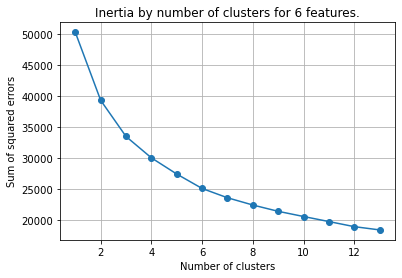

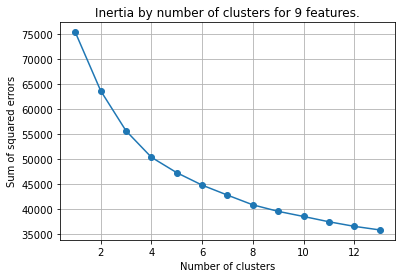

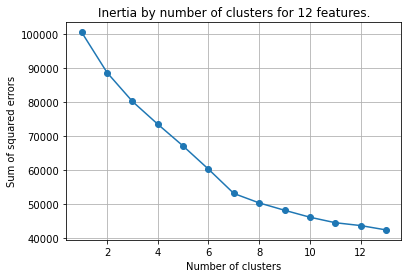

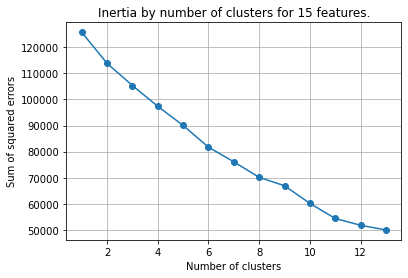

In [18]:
for num_feats in range(6, 16, 3):
    best_k_feats = sorted_selected_features[:num_feats]
    df_best_feats = df_selected[best_k_feats]
    name = 'Inertia by number of clusters for {} features.'.format(num_feats)
    plot_elbow(df_best_feats, name, 1, 13)

None of these plots have the classic "elbow" shape we might hope for. But for 6 or 9 predictors, we at least get a curve which tends to level off as the number of clusters increases. While no one value stands out as a sharp elbow, it seems that 3-4 clusters might be appropriate. For larger number of predictors, there is no distinguishable "elbow" to the curve, which suggests there may not be a natural clustering--at least for the numbers of clusters we've tried.

#### Using Silhouette Scores to evaluate clusterings

By the elbow method, it appears that using 6-9 predictors is more likely to yield a natural clustering with a reasonable number of clusters. The ideal number of clusters is likely 3-4, but may be higher.

Since there's no clear winner for either number of features or number of clusters, we try calculating average silhouette scores for clusterings with different number of clusters, using different numbers of predictors. The larget the silhouette score, the tighter the clustering. We will narrow our focus to clusterings with 5-10 predictors, and 2-8 clusters.

In [19]:
from sklearn.metrics import silhouette_score

def plot_sil(my_data, name, least, most):
    # Function to plot average silhouette score against number of clusters
    # for KMean clustering performed on dataframe passed in as parameter.
    scores = []

    # Compute list of average silhouette scores for clusterings
    for idx in range(least, most+1):
        model=KMeans(n_clusters=idx, random_state=220522)
        cluster_labels = model.fit_predict(my_data)
        my_score = silhouette_score(my_data, cluster_labels)
        scores.append(my_score)
    
    # Plot average silhouette score vs number of clusters
    plt.plot(range(least, most+1), scores, marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Average silhouette score")
    plt.title(name)
    plt.show()

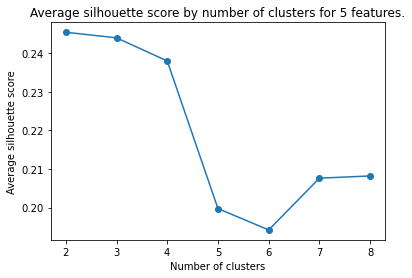

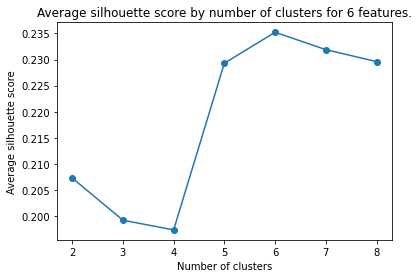

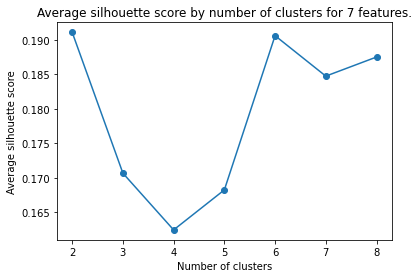

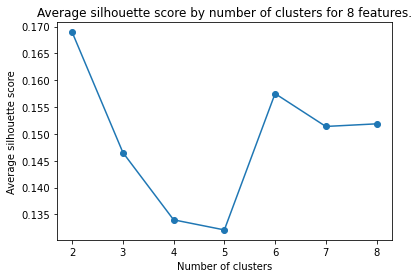

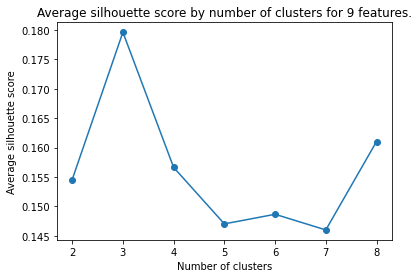

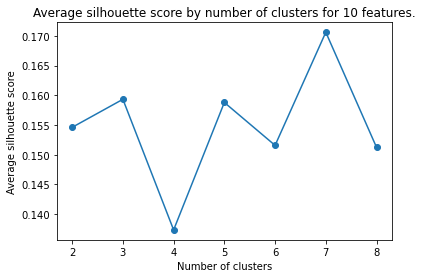

In [20]:
## Using function defined above, plot average silhouette score vs number of clusters
# for the top n features, as n ranges from 6 to 10.
for num_feats in range(5, 11):
    best_k_feats = sorted_selected_features[:num_feats]
    df_best_feats = df_selected[best_k_feats]
    name = 'Average silhouette score by number of clusters for {} features.'.format(num_feats)
    plot_sil(df_best_feats, name, 2, 8)

Again, there is no clear winner, but it looks like using only the top 5 or 6 predictors gives the higher silhouette scores overall. The ideal number of clusters seems to vary by number of features. For the top 5 predictors, using 3 clusters seems to work well. (Using 2 clusters gives a slightly better silhouette score, but a clustering with only 2 cluster is unlikely to tell us much.)

#### Choosing the final clustering: cluster size and Caravan insurance usage

Let's try a clustering with 5 predictors, and 3 clusters. We want clusters that are reasonably balanced in size, with none that are very large of very small.

In [21]:
def get_clustering(feats, k):
    # Function to get a clustering for our data with number of predictors
    # given by `feats` and number of clusters `k`. Prints out average 
    # silhouette score for the clustering, and returns list of cluster labels.
    model = KMeans(n_clusters=k, random_state=220522)
    best = df_selected[sorted_selected_features[:feats]]
    cluster_labels = pd.Series(model.fit_predict(best))
    print(cluster_labels.value_counts())
    print('\n')
    print('Average Silhouette score: ', round(silhouette_score(best, cluster_labels), 2))
    return cluster_labels

In [22]:
cluster_labels = get_clustering(5, 3)

1    3008
2    2963
0    2408
dtype: int64


Average Silhouette score:  0.24


Fortunately, it looks like the clusters we've found are reasonably balanced in size. Now, let's check whether they give us meaningful information about rates of Caravan insurance usage.

In [24]:
# Create data frame containing our top 5 predictors
# with a column for cluster labels.
top5 = sorted_selected_features[:5]
df_predicted = df_selected[top5].copy()
df_predicted['CARAVAN'] = y
df_predicted['CLUSTER'] = cluster_labels
df_predicted.head()

,PPERSAUT,MOSHOOFD,MINKGEM,MOPLLAAG,MAUT1,CARAVAN,CLUSTER
0,1.049762,-0.040809,0.137927,1.076196,1.292059,0,2
1,-1.013240,-0.040809,0.898250,-0.233971,0.636325,0,0
2,1.049762,-0.040809,-0.622396,-0.233971,0.636325,0,2
3,1.049762,0.424875,0.137927,-1.107416,1.947792,0,0
4,-1.013240,-1.461467,1.658573,-1.980861,-0.019408,0,0


In [25]:
cluster_compare = df_predicted.groupby('CLUSTER')['CARAVAN'].agg(['sum', 'count'])
cluster_compare.columns = (['POLICIES', 'TOTAL'])
cluster_compare['RATIO'] = cluster_compare['POLICIES']/cluster_compare['TOTAL']
cluster_compare

,POLICIES,TOTAL,RATIO
CLUSTER,,,
0,258,2408,0.107143
1,83,3008,0.027593
2,227,2963,0.076612


It appears that indeed, some clusters have higher rates of Caravan insurance usage than others. But are these differences statistically significant? We run a $ \chi $-squared test to find out.

In [26]:
from statsmodels.stats.proportion import proportions_chisquare_allpairs
counts = cluster_compare['POLICIES']
nobs = cluster_compare['TOTAL']
print(proportions_chisquare_allpairs(counts, nobs))

Corrected p-values using Holm-Sidak p-value correction

Pairs  p-values
(0, 1)  1.406e-32
(0, 2)  0.0001034
(1, 2)  2.776e-17


It looks as though the three clusters are statistically significant from one another. Let's save this clustered data for later use.

In [27]:
df_predicted.to_csv('../data/processed/clustered_data.csv', index=False)

### Predicting cluster labels using decision trees

For the final phase of this project, we will try fitting a decision tree to the clustered data, to give an actional description of what distinguishes the clusters from each other. The goal here is reasonably elegant and interpretable trees, not perfect prediction accuracy. Nonetheless, we reserve some data as a test set, and use that the evaluate the performance of our decision tree classifiers.

In [30]:
df_for_tree = pd.read_csv('../data/processed/clustered_data.csv')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
## Split data into training and test sets
df_for_tree.head()
X_tree = df_for_tree.drop(['CARAVAN', 'CLUSTER'], axis=1)
y_tree = df_for_tree['CLUSTER']
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size = 0.3)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

We start with a simple, out-of-the box decision tree. So that the tree will not be too complex to visualize, limit the depth to 3. Since our priority is a simple, intepretable tree--not having the best metrics possible--we will visualize the tree before evaluating accuracy.

In [34]:
## Fit tree of depth 3 to the data.
first_tree = DecisionTreeClassifier(max_depth = 3)

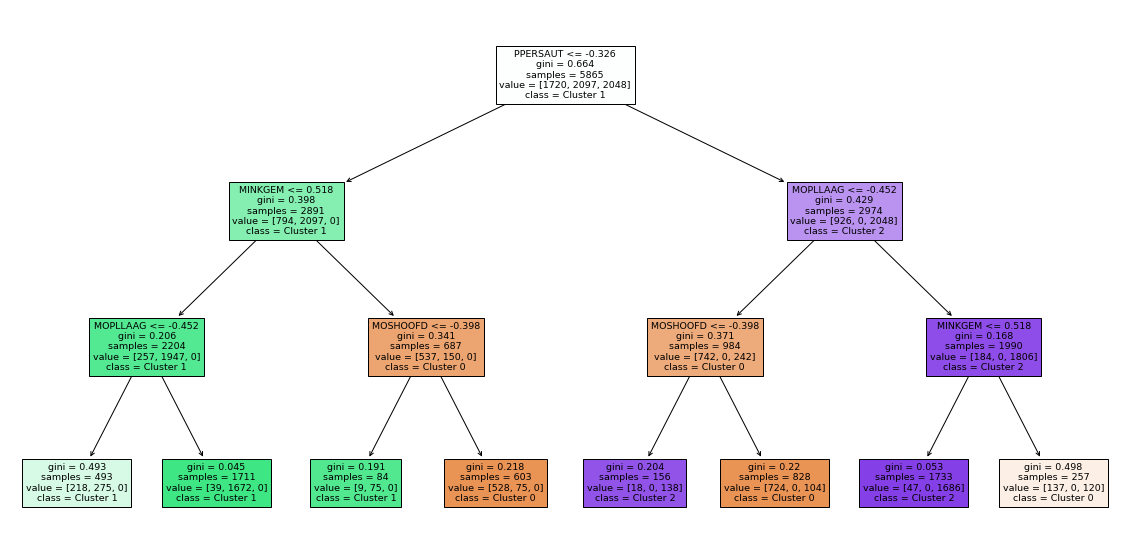

In [35]:
## Define a function that plots a decision tree with desired settings
def nice_plot(my_tree, X, y, height=10, width=20, 
              class_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']):
    plt.figure(figsize=(width, height))
    plot_tree(my_tree, 
              feature_names = X.columns, 
              class_names = class_names,
              filled=True)
    plt.show()

first_tree.fit(X_train, y_train)
nice_plot(first_tree, X_train, y_train)

As a preliminary step, we check some performance metrics on the training set.

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def print_metrics(my_tree, X, y, message = 'Performance on test set:'):
    y_pred = my_tree.predict(X)
    print(message)
    print('Accuracy score: ', round(accuracy_score(y, y_pred), 2))
    print('Recall by cluster: ', np.around(recall_score(y, y_pred, average=None), 2))
    print('Precision by cluster:', np.around(precision_score(y, y_pred, average=None), 2))
    
print_metrics(first_tree, X_train, y_train, 'Performance on the training set:')

Performance on the training set:
Accuracy score:  0.89
Recall by cluster:  [0.81 0.96 0.89]
Precision by cluster: [0.82 0.88 0.97]


The overall accuracy of the decision tree is reasonable, but there are some issues. 
- The tree is too complicated. We want something simple and easy to interpret.
- Even on the training set, some leaves are very impure, with gini index close to 0.5
- Not all splits seem to add information. (Look at the split of one 'green' node into two 'green' nodes at left.)
- Possibly most important: the tree is struggling to accurately predict Cluster 0. Since this cluster consists of the highest-value customers, this is a serious problem.

#### Tuning our tree model

Our out-of-the-box tree seems to have some splits which are not very informative, leading to a cluttered visualization. Let's try turning the min_impurity_decrease hyperparameter, to see if that helps.

Min impurity decrease:  0.05
Training accuracy:  0.86


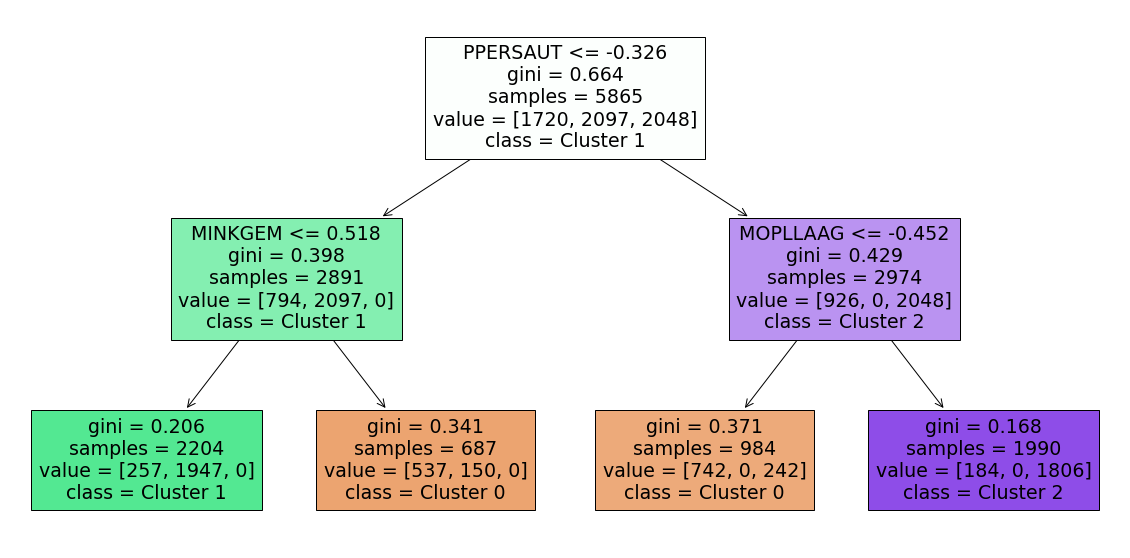



Min impurity decrease:  0.025
Training accuracy:  0.88


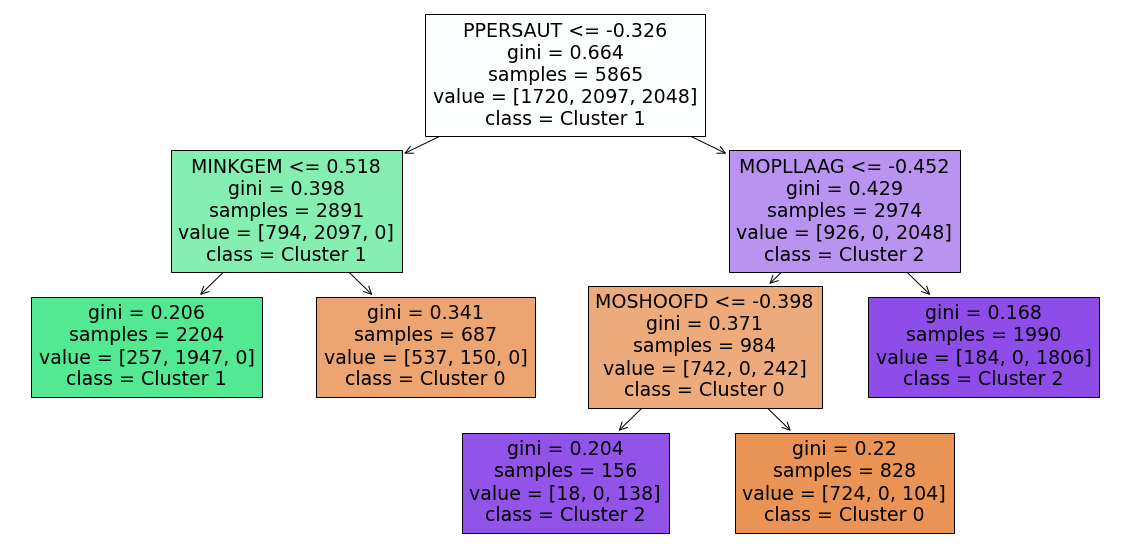



Min impurity decrease:  0.01
Training accuracy:  0.92


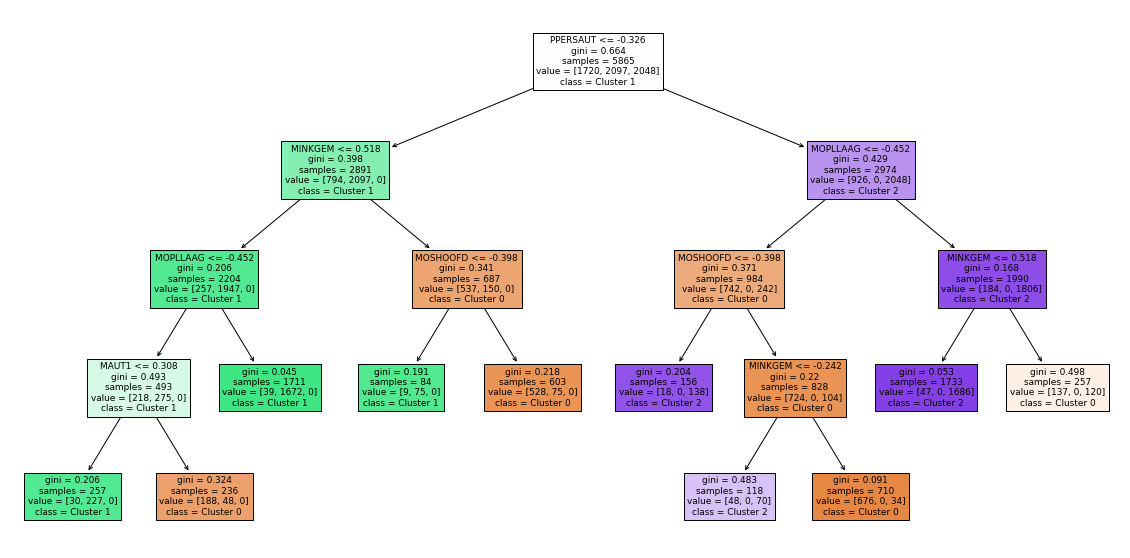

In [37]:
for dec in [0.05, 0.025, 0.01]:
    next_tree = DecisionTreeClassifier(min_impurity_decrease = dec)
    next_tree.fit(X_train, y_train)
    print('Min impurity decrease: ', dec)
    y_pred = next_tree.predict(X_train)
    print('Training accuracy: ', round(accuracy_score(y_train, y_pred), 2))
    nice_plot(next_tree, X_train, y_train)
    print('\n')

The middle tree has comparable accuracy to our original tree with three levels, but simpler and has no very impure leaves. We select this as our final tree model for predicting all cluster labels at once. Next, we evalate performance of this tree on the test set.

In [38]:
best_tree = DecisionTreeClassifier(min_impurity_decrease = 0.025)
best_tree.fit(X_train, y_train)
print_metrics(best_tree, X_test, y_test)

Performance on test set:
Accuracy score:  0.88
Recall by cluster:  [0.73 0.93 0.95]
Precision by cluster: [0.82 0.9  0.91]


Unfortunately, this tree also does not predict Cluster 0 very well. We address this problem in the next section.

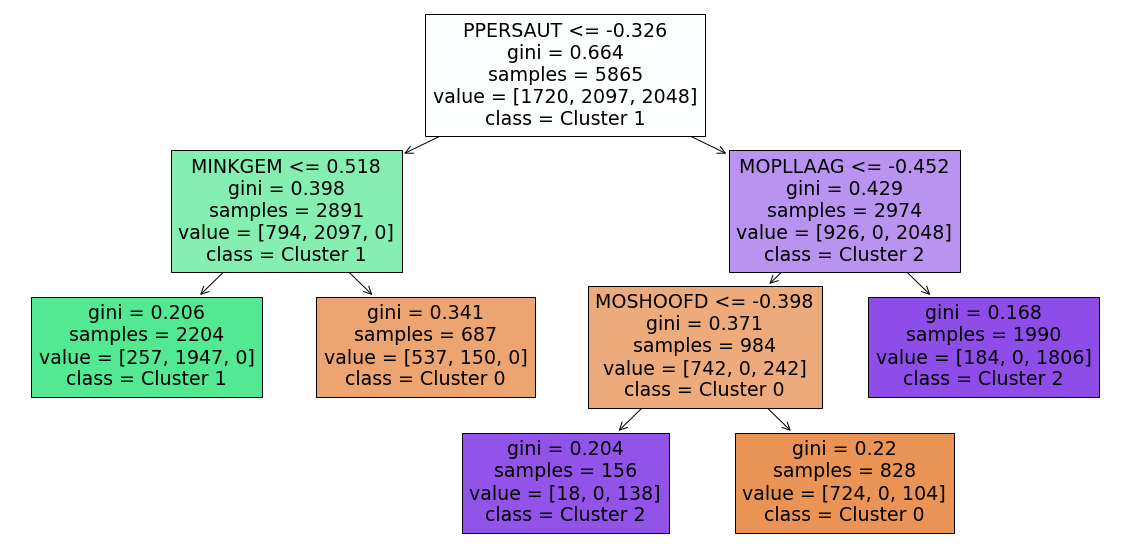

In [39]:
## Plot our selected tree
nice_plot(best_tree, X_train, y_train)

### Predicting labels one cluster at a time

In the decision tree where we distinguish between the three clusters, Clusters 1 and 2 are easily distinguished, but Cluster 0 is getting lost. To address this, we now try separately predicting each cluster versus the other two.

In [41]:
X_tree.head()

,PPERSAUT,MOSHOOFD,MINKGEM,MOPLLAAG,MAUT1
0,1.049762,-0.040809,0.137927,1.076196,1.292059
1,-1.013240,-0.040809,0.898250,-0.233971,0.636325
2,1.049762,-0.040809,-0.622396,-0.233971,0.636325
3,1.049762,0.424875,0.137927,-1.107416,1.947792
4,-1.013240,-1.461467,1.658573,-1.980861,-0.019408


In [42]:
names = X_tree.columns
meanings = ['amt_car_policies', 'customer_type', 'avg_income', 'percent_low_ed', 'one_car']
new_names = dict(zip(names, meanings))
X_tree = X_tree.rename(columns = new_names)
X_tree.head()

,amt_car_policies,customer_type,avg_income,percent_low_ed,one_car
0,1.049762,-0.040809,0.137927,1.076196,1.292059
1,-1.013240,-0.040809,0.898250,-0.233971,0.636325
2,1.049762,-0.040809,-0.622396,-0.233971,0.636325
3,1.049762,0.424875,0.137927,-1.107416,1.947792
4,-1.013240,-1.461467,1.658573,-1.980861,-0.019408


In [43]:
y_train_encoded = pd.get_dummies(y_train, columns = ['CLUSTER'])
y_test_encoded = pd.get_dummies(y_test, columns=['CLUSTER'])
y0_train, y1_train, y2_train = y_train_encoded[0], y_train_encoded[1], y_train_encoded[2]
y0_test, y1_test, y2_test = y_test_encoded[0], y_test_encoded[1], y_test_encoded[2]

#### Predicting Cluster 0

Let's start with a decision tree that has the same settings as the one chosen for predicting all cluster labels simultaneously.

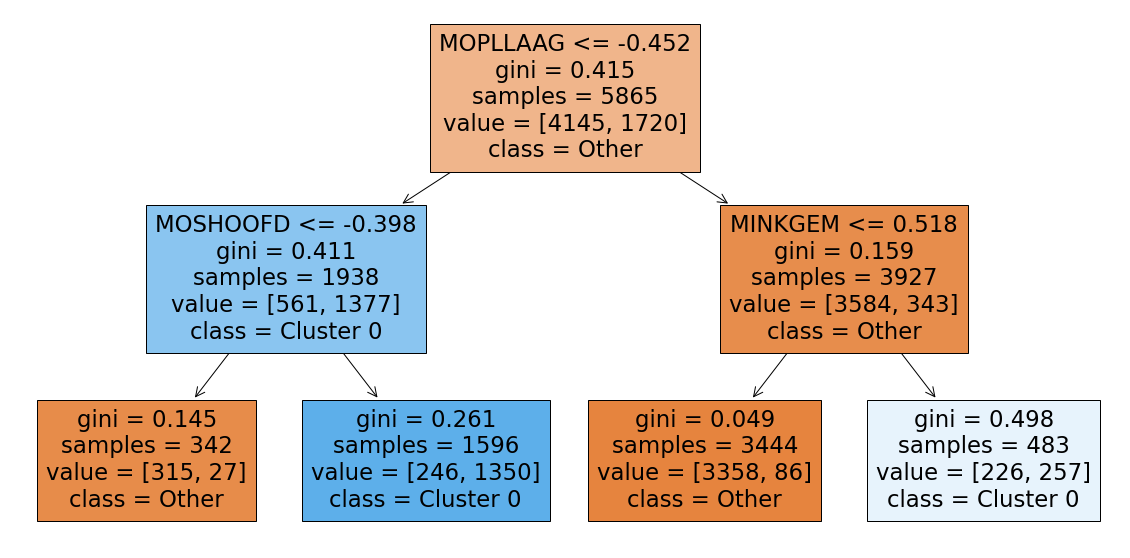

Performance on the training set:
Accuracy score:  0.9
Recall by cluster:  [0.89 0.93]
Precision by cluster: [0.97 0.77]


In [45]:
tree0 = DecisionTreeClassifier(min_impurity_decrease = 0.025)
tree0.fit(X_train, y0_train)
nice_plot(tree0, X_train, y0_train, class_names = ['Other', 'Cluster 0'])
print_metrics(tree0, X_train, y0_train, 'Performance on the training set:')

This tree is somewhat simplistic, with only two levels, and has one leaf which is very impure. Precision remains low for Cluster 0, even on the training set. We try decreasing the `min_impurity_decrease` hyperparamter, to see if that helps.

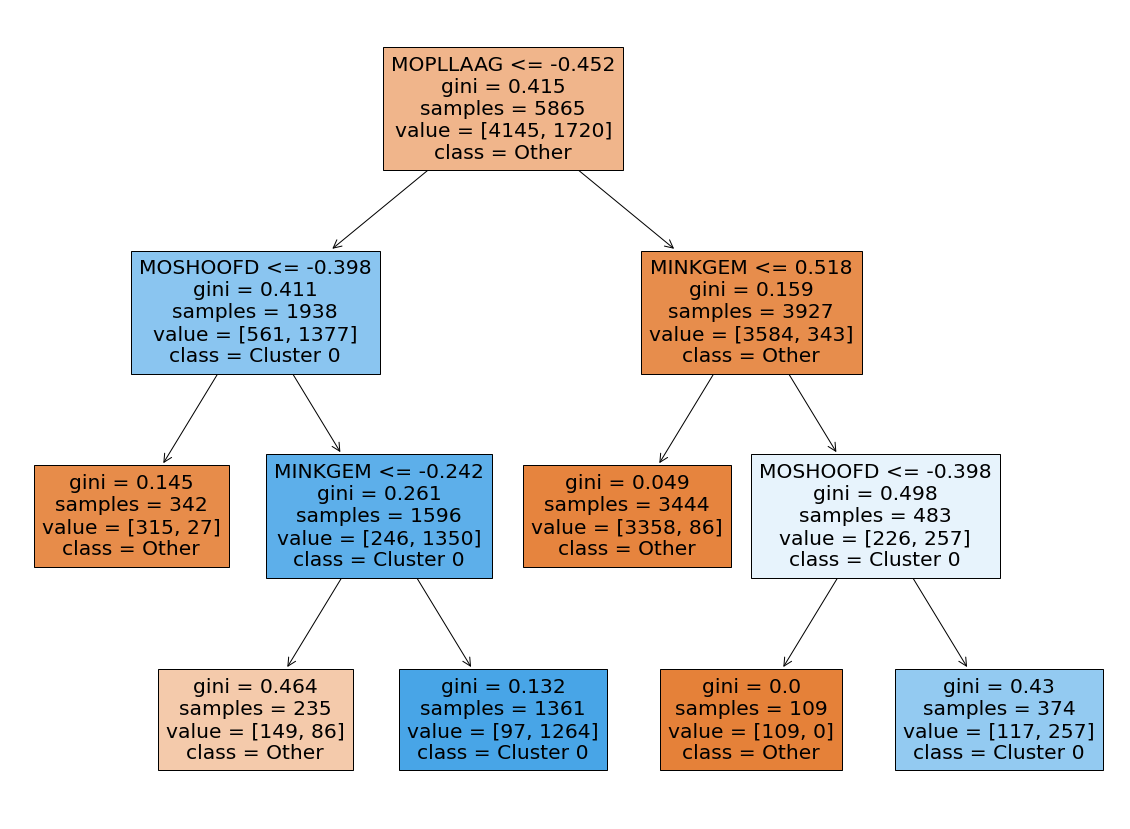

Performance on test set:
Accuracy score:  0.93
Recall by cluster:  [0.95 0.88]
Precision by cluster: [0.95 0.88]


In [47]:
tree0 = DecisionTreeClassifier(min_impurity_decrease = 0.01, criterion='gini')
tree0.fit(X_train, y0_train)
nice_plot(tree0, X_train, y0_train, class_names = ['Other', 'Cluster 0'], height=15)
print_metrics(tree0, X_train, y0_train)

That looks a bit better. Recall on Cluster 0 has decreased, but but precision has decreased by 5 percentage points, but precision has increased by 11 percentage points. Overall accuracy is better, and fewer samples are contained in very impure leaves. We take this to be our final tree for distinguishing Cluster 0 from the rest, and evaluate on the test data.

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print_metrics(tree0, X_test, y0_test)

Performance on test set:
Accuracy score:  0.93
Recall by cluster:  [0.95 0.88]
Precision by cluster: [0.95 0.88]


It appears that this tree correctly identifies 88% of records from Cluster 0, compared to 74% for the tree that attempted to predict all three labels at once.

#### Predicting Clusters 1 and 2

For each of these clusters, using the same settings as for the main tree essentially recovers the same splits as the original decision tree, with the clusters not under consideration being merged into one in each case. Since the original tree performed well on these clusters, there is not much benefit to prediction accuracy by considering them individually.

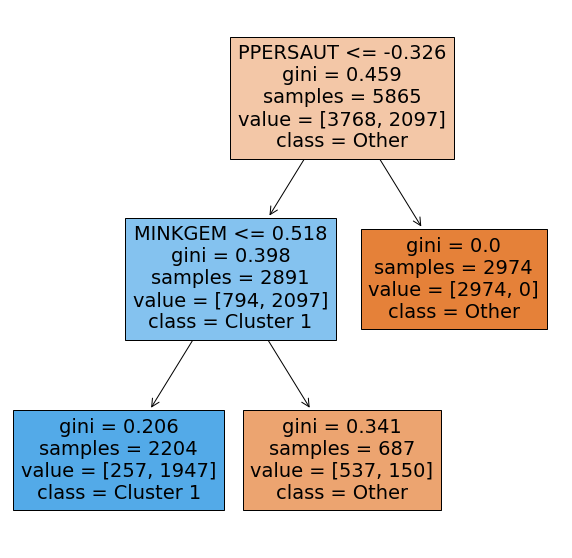

In [49]:
## Visualize the decision tree for Cluster 1.

tree1 = DecisionTreeClassifier(min_impurity_decrease = 0.025)
tree1.fit(X_train, y1_train)
nice_plot(tree1, X_train, y1_train, 
          height = 10,
          width = 10,
          class_names = ['Other', 'Cluster 1'])

In [50]:
## Metrics for tree to identify Cluster 1.
print_metrics(tree1, X_test, y1_test)

Performance on test set:
Accuracy score:  0.93
Recall by cluster:  [0.94 0.93]
Precision by cluster: [0.96 0.9 ]


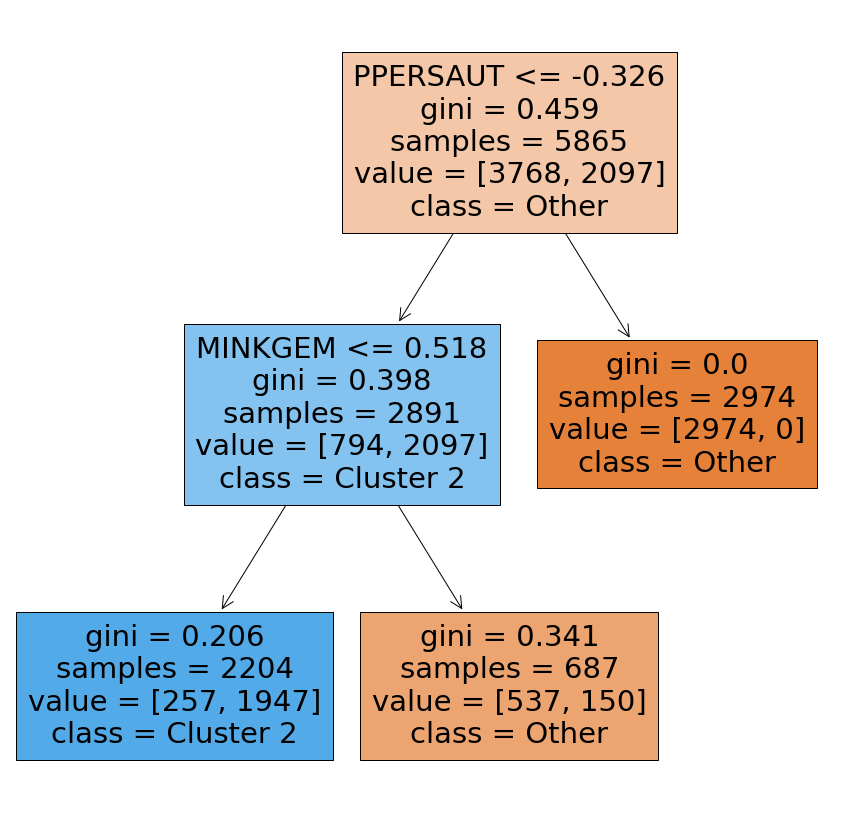

In [51]:
## Visualize tree to identity Cluster 2.
tree2 = DecisionTreeClassifier(min_impurity_decrease = 0.025)
tree2.fit(X_train, y2_train)
nice_plot(tree1, X_train, y2_train, width=15, 
                                    height=15,
                                    class_names = ['Other', 'Cluster 2'])

In [52]:
# Print metrics for Cluster 2.
print_metrics(tree2, X_test, y2_test)

Performance on test set:
Accuracy score:  0.95
Recall by cluster:  [0.95 0.95]
Precision by cluster: [0.97 0.91]


### Interpreting The Trees

We have found two decision trees that let us identify customers who fall into each cluster.
To get a better description of the clusters, we plot feature importances for each tree.

In [53]:
def plot_importances(my_tree, title=''):
    importances = my_tree.feature_importances_
    importances_series = pd.Series(importances, index=X_tree.columns)
    importances_series = importances_series.sort_values(ascending=False)
    importances_series.plot(kind='bar', title = title)
    plt.show()

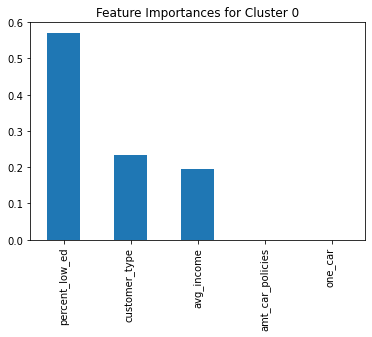

In [54]:
plot_importances(tree0, 'Feature Importances for Cluster 0')

In [ ]:
plot_importances(tree1, 'Feature Importances for Cluster 1')

In [ ]:
plot_importances(tree2, 'Feature Importances for Cluster 2')

These plots, together with the trees themselves, allow us to tell a story about each cluster.
- **Cluster 0:** People in this cluster are the most likely to buy caravan insurance. This cluster is primarily determined by education level. Postal codes in this cluster tend to have fewer people with lower education attainment. The other important factors are Customer Type, coded as one of ten categories, and income. Cluster 0 customers tend to have higher average incomes, and tend to be from Customer Type categories with higher levels of Caravan insurance ownership. (See note below.)
- **Cluster 1:** This cluster is characterized by lower contributions to car insurance policies, and lower average incomes. These customers are very unlikely to purchase Caravan insurance. 
- **Cluster 2:** This cluster is characterized by higher contributions to car policies, but lower education levels. These may be successfull blue-collar workers and families. They tend to purchase Caravan insurance at levels slightly above the population as a whole.

#### Note: Demographic categories with higher levels of Caravan ownership

In [ ]:
## Print a list of Customer Type categories with higher level of Caravan ownership
## Cluster 0 customers tend to be in these categories.

decode = pd.DataFrame({'original': df['MOSHOOFD'], 'encoded': X['MOSHOOFD']})
decode = decode.groupby('original').mean()
decode.loc[decode['encoded'] > -0.398].index.to_list()

Referencing the code book, these codes mean:
- **Type 1:** Successful hedonists.
- **Type 2:** Driven growers.
- **Type 3:** Average Family.
- **Type 8:** Families with grownups.
- **Type 9:** Conservative families.

All the Customer Type categories that reference "family" are included. Our Cluster 0 customers are either family groups, or well-off people interested in luxury consumption. Marketing efforts for Caravan Insurance could focus on projecting a wholesome, family image, or attempt to sell Caravan ownership as a status symbol.